In [53]:
import os

import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
from utils import *

import tensorflow as tf

In [132]:
def stack_frames(to_be_stacked, compass):
    
    stacked_frames = deque([np.zeros((64,64), dtype=np.uint) for i in range(stack_size)], maxlen=4)
    compass_channel = np.ones(shape=list(to_be_stacked[0].shape[:-1]) + [1], dtype=to_be_stacked.dtype) * compass

    if len(to_be_stacked) != 4:
        for x in range(4-len(to_be_stacked)):
            stacked_frames.append(np.array(Image.fromarray(to_be_stacked[0].reshape(64,64,3), "RGB").convert("L")))
        for x in range(len(to_be_stacked)):
            stacked_frames.append(np.array(Image.fromarray(to_be_stacked[x].reshape(64,64,3), "RGB").convert("L")))
        
        stacked_frames = np.stack(stacked_frames, axis=2)
        stacked_frames = np.concatenate([stacked_frames, compass_channel], axis=-1)
    else:
        for x in range(len(to_be_stacked)):
            stacked_frames.append(np.array(Image.fromarray(to_be_stacked[x].reshape(64,64,3), "RGB").convert("L")))
        
        stacked_frames = np.stack(stacked_frames, axis=2)
        stacked_frames = np.concatenate([stacked_frames, compass_channel], axis=-1)
    
    return stacked_frames

(array([[[[138., 174., 246.],
          [138., 174., 246.],
          [137., 173., 245.],
          ...,
          [138., 174., 246.],
          [140., 174., 240.],
          [141., 175., 241.]],
 
         [[139., 175., 247.],
          [138., 174., 246.],
          [138., 174., 246.],
          ...,
          [138., 174., 246.],
          [141., 175., 241.],
          [151., 185., 251.]],
 
         [[139., 175., 247.],
          [139., 175., 247.],
          [136., 174., 246.],
          ...,
          [154., 185., 243.],
          [157., 185., 237.],
          [157., 185., 237.]],
 
         ...,
 
         [[ 69.,  68., 182.],
          [ 76.,  75., 189.],
          [ 73.,  76., 193.],
          ...,
          [ 70.,  69., 183.],
          [ 68.,  67., 181.],
          [ 69.,  68., 182.]],
 
         [[ 73.,  76., 193.],
          [ 66.,  69., 186.],
          [ 79.,  82., 199.],
          ...,
          [ 75.,  88., 202.],
          [ 57.,  62., 179.],
          [ 63.,  68., 185.

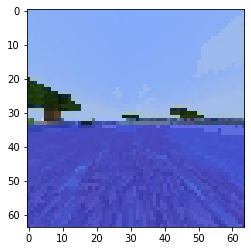

In [133]:
path = "C:\\Users\\Robin\\Desktop\\deep_learning\\MineRLNavigateDense-v0\\"

def generate_random_video(path, batch_size=1):
    frame_shape = 64*64*3
    
    videos = list(os.listdir(path))
    
    random_video_num = np.random.randint(len(videos))
    rand_vid = os.path.join(path+videos[random_video_num])
    
    vid_labels = np.load(rand_vid+"\\rendered.npz", allow_pickle=True)
    vid_labels = [vid_labels[x] for x in vid_labels.keys()]
    
    compass_angle = np.array(vid_labels[1])/180.
    
    camera_x = np.array([x[0] for x in vid_labels[11]])/180.
    camera_y = np.array([x[1] for x in vid_labels[11]])/180.
    place = vid_labels[-1]
    vid_labels = vid_labels[:11]
    vid_labels.append(camera_x)
    vid_labels.append(camera_y)
    vid_labels.append(place)
    vid_labels = vid_labels[3:]
    
    for i in range(len(vid_labels[-1])):
        if vid_labels[-1][i] == "none":
            vid_labels[-1][i] = 0
        else:
            vid_labels[-1][i] = 1
    
    actions = []
    for i in range(len(vid_labels[0])):
        action_cluster = []
        for x in range(11):
            action_cluster.append(vid_labels[x][i])
        actions.append(action_cluster)
    
    load_vid = np.load(rand_vid+"\\NDTRAIN.npy", allow_pickle=True)[0]
    
    frames = int(load_vid.shape[0]/frame_shape)
    
    reshaped_vid = load_vid.reshape(frames, 64, 64, 3)[-len(vid_labels[0]):]
    plt.imshow(reshaped_vid[0].astype(np.uint8))
    
    return reshaped_vid, actions, compass_angle

generate_random_video(path)

In [134]:
model = build_dqn()
model.compile(loss="binary_crossentropy", optimizer="Adam")

0
(1, 64, 64, 5)
1
(1, 64, 64, 5)
2
(1, 64, 64, 5)
3
(1, 64, 64, 5)
4
(1, 64, 64, 5)
5
(1, 64, 64, 5)
6
(1, 64, 64, 5)
7
(1, 64, 64, 5)
8
(1, 64, 64, 5)
9
(1, 64, 64, 5)
10
(1, 64, 64, 5)
11
(1, 64, 64, 5)
12
(1, 64, 64, 5)
13
(1, 64, 64, 5)
14
(1, 64, 64, 5)
15
(1, 64, 64, 5)
16
(1, 64, 64, 5)
17
(1, 64, 64, 5)
18
(1, 64, 64, 5)
19
(1, 64, 64, 5)
20
(1, 64, 64, 5)
21
(1, 64, 64, 5)
22
(1, 64, 64, 5)
23
(1, 64, 64, 5)
24
(1, 64, 64, 5)
25
(1, 64, 64, 5)
26
(1, 64, 64, 5)
27
(1, 64, 64, 5)
28
(1, 64, 64, 5)
29
(1, 64, 64, 5)
30
(1, 64, 64, 5)
31
(1, 64, 64, 5)
32
(1, 64, 64, 5)
33
(1, 64, 64, 5)
34
(1, 64, 64, 5)
35
(1, 64, 64, 5)
36
(1, 64, 64, 5)
37
(1, 64, 64, 5)
38
(1, 64, 64, 5)
39
(1, 64, 64, 5)
40
(1, 64, 64, 5)
41
(1, 64, 64, 5)
42
(1, 64, 64, 5)
43
(1, 64, 64, 5)
44
(1, 64, 64, 5)
45
(1, 64, 64, 5)
46
(1, 64, 64, 5)
47
(1, 64, 64, 5)
48
(1, 64, 64, 5)
49
(1, 64, 64, 5)
50
(1, 64, 64, 5)
51
(1, 64, 64, 5)
52
(1, 64, 64, 5)
53
(1, 64, 64, 5)
54
(1, 64, 64, 5)
55
(1, 64, 64, 5)
56

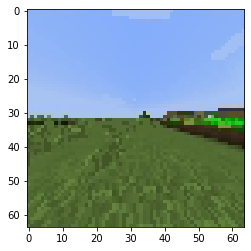

In [143]:
def train_model(model, n_epochs=100):
    
    for epoch in range(n_epochs):
        video, actions, compass_angle = generate_random_video(path)

        print(epoch)
        batch = np.random.randint(video.shape[0])
        video = np.array(video[batch-4:batch])
        actions = np.array(actions[batch])
        frames = stack_frames(video, compass_angle[batch]).reshape(1, 64, 64, 5)
        print(frames.shape)
        
        model.train_on_batch(frames, np.array(actions).astype(np.float32))

train_model(model)

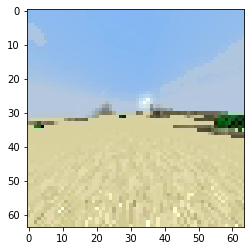

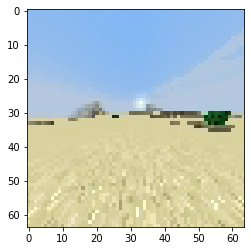

1/1 [==============================] - 0s 6ms/step - loss: 9.7360
Guessed actions:  [[-10863.096       107.66589     -79.7601       70.2724   -18432.05
  -28904.96        -83.26297     100.35303      38.143185  -6888.64
      31.19781 ]]
Actual actions:  ['1' '0' '0' '0' '0' '0' '1' '0' '0.0' '0.0' '0']


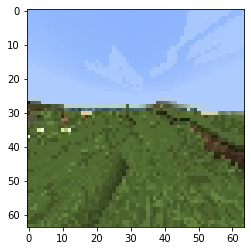

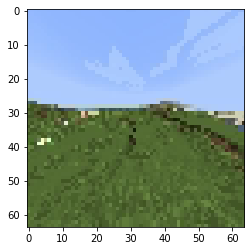

1/1 [==============================] - 0s 7ms/step - loss: 8.3337
Guessed actions:  [[-1.47293291e+04  1.46669037e+02 -1.13005806e+02  1.18838089e+02
  -2.39843867e+04 -3.57525391e+04 -7.52707291e+01  1.12203255e+02
   6.94279251e+01 -7.98293506e+03  2.70206833e+01]]
Actual actions:  ['1' '0' '0' '0' '0' '0' '0' '0' '0.0' '0.0' '0']


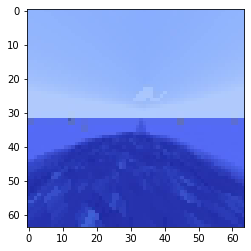

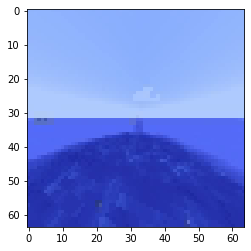

1/1 [==============================] - 0s 5ms/step - loss: 9.7407
Guessed actions:  [[-14070.734       157.49359     -83.621025    114.887375 -23130.133
  -34784.992       -86.8768      100.17301      80.3765    -7850.941
      41.209652]]
Actual actions:  ['1' '0' '0' '0' '1' '0' '0' '0' '-0.0' '0.0033333355' '0']


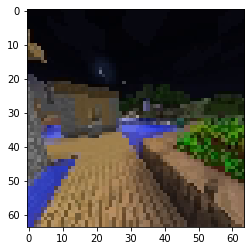

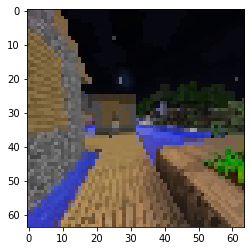

1/1 [==============================] - 0s 3ms/step - loss: 5.5309
Guessed actions:  [[-3.9874910e+03  3.1961817e+01 -5.3823757e+01  4.9843659e+00
  -8.0410684e+03 -1.4720160e+04 -4.0870586e+01  3.2621479e+01
   1.5534037e+01 -3.6141997e+03 -2.6430498e+01]]
Actual actions:  ['0' '0' '0' '0' '0' '0' '0' '0' '-0.016666668' '-0.026666684' '0']


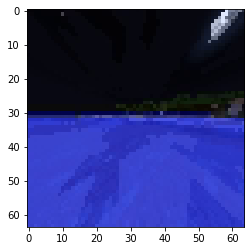

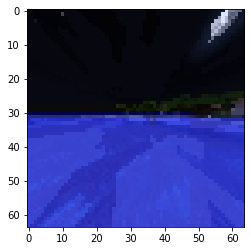

1/1 [==============================] - 0s 12ms/step - loss: 9.7520
Guessed actions:  [[-3.9421614e+03  4.6011864e+01 -4.6209671e+01  2.0825163e+01
  -7.5733613e+03 -1.3954536e+04 -5.2947628e+01  3.1234188e+01
   2.7814220e+01 -3.6933770e+03 -1.2828215e+01]]
Actual actions:  ['1' '0' '0' '0' '1' '0' '1' '0' '0.0' '0.0' '0']


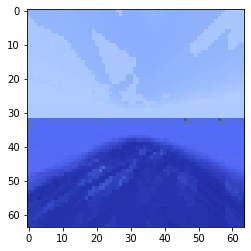

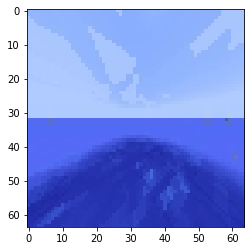

1/1 [==============================] - 0s 4ms/step - loss: 11.1383
Guessed actions:  [[-14096.42        140.03867     -86.19323     108.29456  -22977.926
  -34713.227       -89.263306    111.96175      56.312473  -7945.5425
      44.90577 ]]
Actual actions:  ['1' '0' '0' '0' '1' '0' '1' '0' '0.0' '0.0' '0']


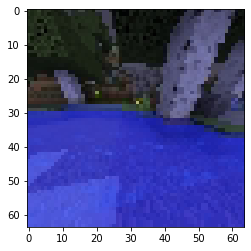

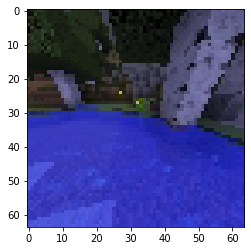

1/1 [==============================] - 0s 6ms/step - loss: 8.3497
Guessed actions:  [[-6.6598232e+03  6.8834221e+01 -5.4399292e+01  5.2802856e+01
  -1.1391406e+04 -1.9452197e+04 -6.7250854e+01  4.7885605e+01
   2.2604149e+01 -4.8348486e+03 -1.3629994e+00]]
Actual actions:  ['1' '0' '0' '0' '1' '0' '0' '0' '0.0' '0.0' '0']


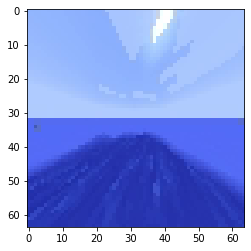

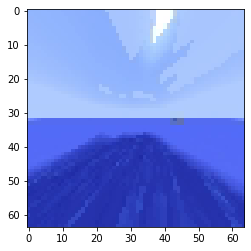

1/1 [==============================] - 0s 3ms/step - loss: 11.1383
Guessed actions:  [[-14920.036       164.38332    -104.50981     127.54317  -24068.344
  -36287.043       -75.92433     106.03869      51.281254  -8233.143
      51.094315]]
Actual actions:  ['1' '0' '0' '0' '1' '0' '1' '0' '0.0' '0.0' '0']


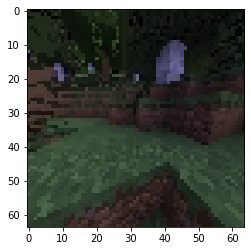

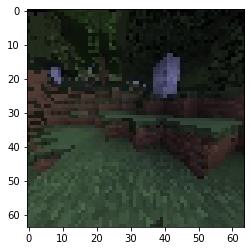

1/1 [==============================] - 0s 3ms/step - loss: 9.7918
Guessed actions:  [[-4.5113550e+03  3.5830193e+01 -5.3658058e+01  1.3574702e+01
  -8.6553662e+03 -1.5232049e+04 -4.9087730e+01  3.5558701e+01
   4.0193920e+00 -3.7478127e+03  2.8868368e+00]]
Actual actions:  ['1' '0' '0' '0' '1' '0' '0' '0' '-0.01583333' '0.024166701' '0']


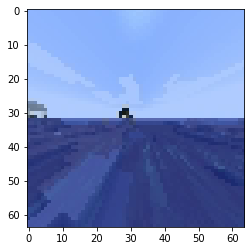

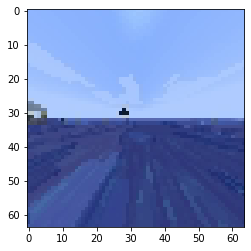

1/1 [==============================] - 0s 4ms/step - loss: 8.3485
Guessed actions:  [[-13809.183       140.0236      -86.240616    104.325165 -22361.264
  -34449.758       -93.57144     104.755646     69.375656  -7961.4717
      38.841053]]
Actual actions:  ['1' '0' '0' '1' '0' '0' '1' '0' '-0.0' '-0.0008333418' '0']


In [152]:
for i in range(10):    
    video, actions, compass_angle = generate_random_video(path)

    batch = np.random.randint(video.shape[0])
    video = np.array(video[batch-4:batch])

    plt.imshow(video[0].astype(np.uint8))
    plt.show()

    plt.imshow(video[-1].astype(np.uint8))
    plt.show()

    actions = np.array(actions[batch])
    frames = stack_frames(video, compass_angle[batch]).reshape(1, 64, 64, 5)

    model.evaluate(frames, np.array(actions).astype(np.float32).reshape(1, 11))

    print("Guessed actions: ", model.predict(frames))
    print("Actual actions: ", actions)